In [27]:
import os
os.chdir('/Coding/CVPR2025_abaw_framewise/')

In [28]:
import pandas as pd
import csv, ffmpeg

data = []

with open('data_abaw/default-split/val.txt', 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(',', 2)
        video_path, label, text = parts
        data.append([video_path, label, text])

df = pd.DataFrame(data, columns=['video_path', 'id', 'text'])

df.head()

,video_path,id,text
0,82688/Visite_1/82688_Question_1_2024-11-14_13-...,1,"after waking up, one of the things that I do m..."
1,82688/Visite_1/82688_Question_2_2024-11-14_13-...,1,So a hobby that really brings me joy is actual...
2,82688/Visite_1/82688_Question_3_2024-11-14_14-...,1,One activity that I really dislike doing is pu...
3,82688/Visite_1/82688_Question_4_2024-11-14_13-...,1,"An activity that I enjoy, but I wish I could s..."
4,82688/Visite_1/82688_Question_5_2024-11-14_14-...,1,An activity that I'm almost always willing to ...


In [ ]:
def get_media_properties(base_path, video_path):
    path = os.path.join(base_path, video_path)
    probe = ffmpeg.probe(path)    
    audio_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'audio'), None)
    sample_rate = int(audio_stream['sample_rate']) if audio_stream else None
    duration = float(audio_stream['duration']) if audio_stream else None
    video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)
    frame_rate = eval(video_stream['r_frame_rate']) if video_stream else None  
    
    return sample_rate, duration, frame_rate

sample_rates = []
durations = []
frame_rates = []

try:
    for index, row in df.iterrows():
        video_path = row['video_path']
        sample_rate, duration, frame_rate = get_media_properties(base_path="data_abaw/videos" ,video_path=video_path)
        sample_rates.append(sample_rate)
        durations.append(duration)
        frame_rates.append(frame_rate)
except ffmpeg.Error as e:
    print(e)
    print(e.stderr.decode('utf-8'))

df['sample_rate'] = sample_rates
df['duration'] = durations
df['frame_rate'] = frame_rates

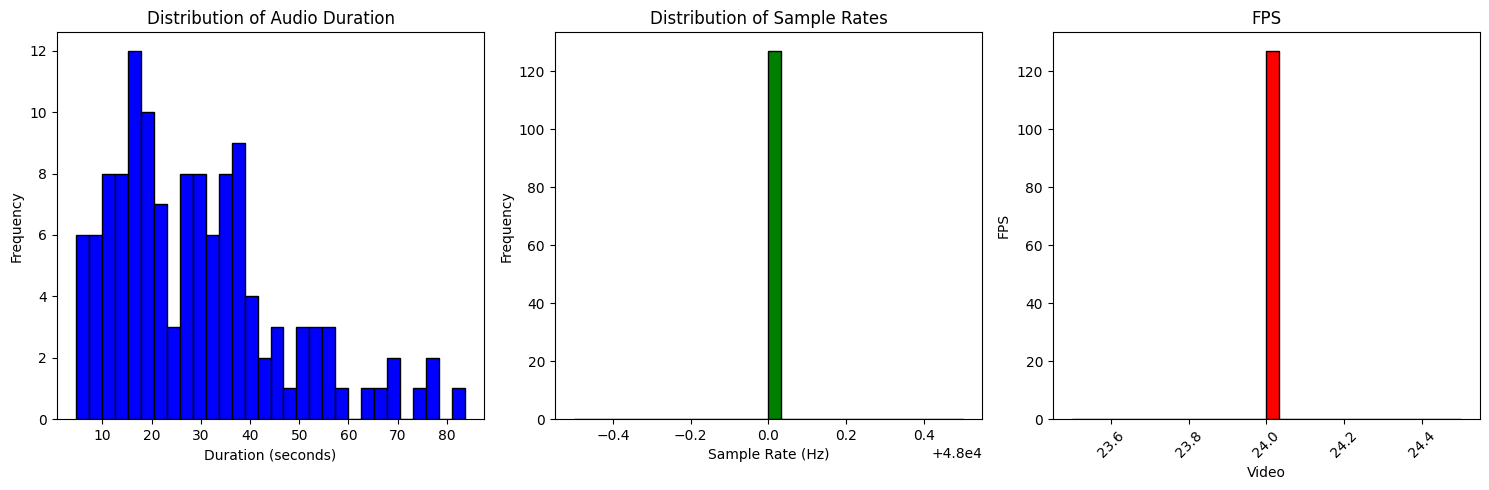

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for Duration
axes[0].hist(df['duration'], bins=30, color='blue', edgecolor='black')
axes[0].set_title('Distribution of Audio Duration')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')

# Histogram for Sample Rate
axes[1].hist(df['sample_rate'], bins=30, color='green', edgecolor='black')
axes[1].set_title('Distribution of Sample Rates')
axes[1].set_xlabel('Sample Rate (Hz)')
axes[1].set_ylabel('Frequency')

# Histogram for Frame Rate
axes[2].hist(df['frame_rate'], bins=30, color='red', edgecolor='black')
axes[2].set_title('FPS')
axes[2].set_xlabel('Video')
axes[2].set_ylabel('FPS')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [37]:
unique_frame_rates = df['frame_rate'].unique()
print(unique_frame_rates)

[24.]


In [ ]:
def extract_audio_and_save(base_path, video_path, output_base_path):
    # Construct the full path to the video file
    input_path = os.path.join(base_path, video_path)
        
    # Define the output WAV file path
    wav_filename = os.path.basename(video_path).removesuffix('.mp4') + '.wav'
    output_path = os.path.join(output_base_path, video_path, wav_filename)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Extract and save the audio as a WAV file
    # 48kHz -> ffmpeg.input(input_path).output(output_path, format='wav').run(overwrite_output=True)
    ffmpeg.input(input_path).output(output_path, format='wav', ar=16000).run(overwrite_output=True)

# try:
#     for index, row in df.iterrows():
#         video_path = row['video_path']
#         extract_audio_and_save(base_path="data_abaw/videos" ,video_path=video_path, output_base_path="data_abaw/sound_16kHz")
# except ffmpeg.Error as e:
#     print(e)
#     print(e.stderr.decode('utf-8'))


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Same Code but only to create missing .wav files

def extract_audio_and_save(base_path, video_path, output_base_path):
    # Construct the full path to the video file
    input_path = os.path.join(base_path, video_path)
        
    # Define the output WAV file path
    wav_filename = os.path.basename(video_path).removesuffix('.mp4') + '.wav'
    output_path = os.path.join(output_base_path, video_path, wav_filename)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    if not os.path.exists(output_path):
        # Extract and save the audio as a WAV file
        # 48kHz -> ffmpeg.input(input_path).output(output_path, format='wav').run(overwrite_output=True)
        ffmpeg.input(input_path).output(output_path, format='wav', ar=16000).run(overwrite_output=True)

try:
    for index, row in df.iterrows():
        video_path = row['video_path']
        extract_audio_and_save(base_path="data_abaw/videos", video_path=video_path, output_base_path="data_abaw/sound_16kHz")
except ffmpeg.Error as e:
    print(e)
    if e.stderr:
        print(e.stderr.decode('utf-8'))


In [ ]:
df.iloc[0]["file_path"]

'82622/Visite_1/82622_Question_7_2024-11-05_15-15-03_Video'